In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('all_results_814.csv')

df = df[df['sigma'].isin([0.2, 0.4, 0.6, 0.8, 1.0])]
print(df.columns)

Index(['sigma', 'fee_rate', 'pnl', 'fee', 'volume', 'price_distance',
       'dynamic_fee', 'total_transactions'],
      dtype='object')


### I.      Fee Rate vs. Total Fees Collected

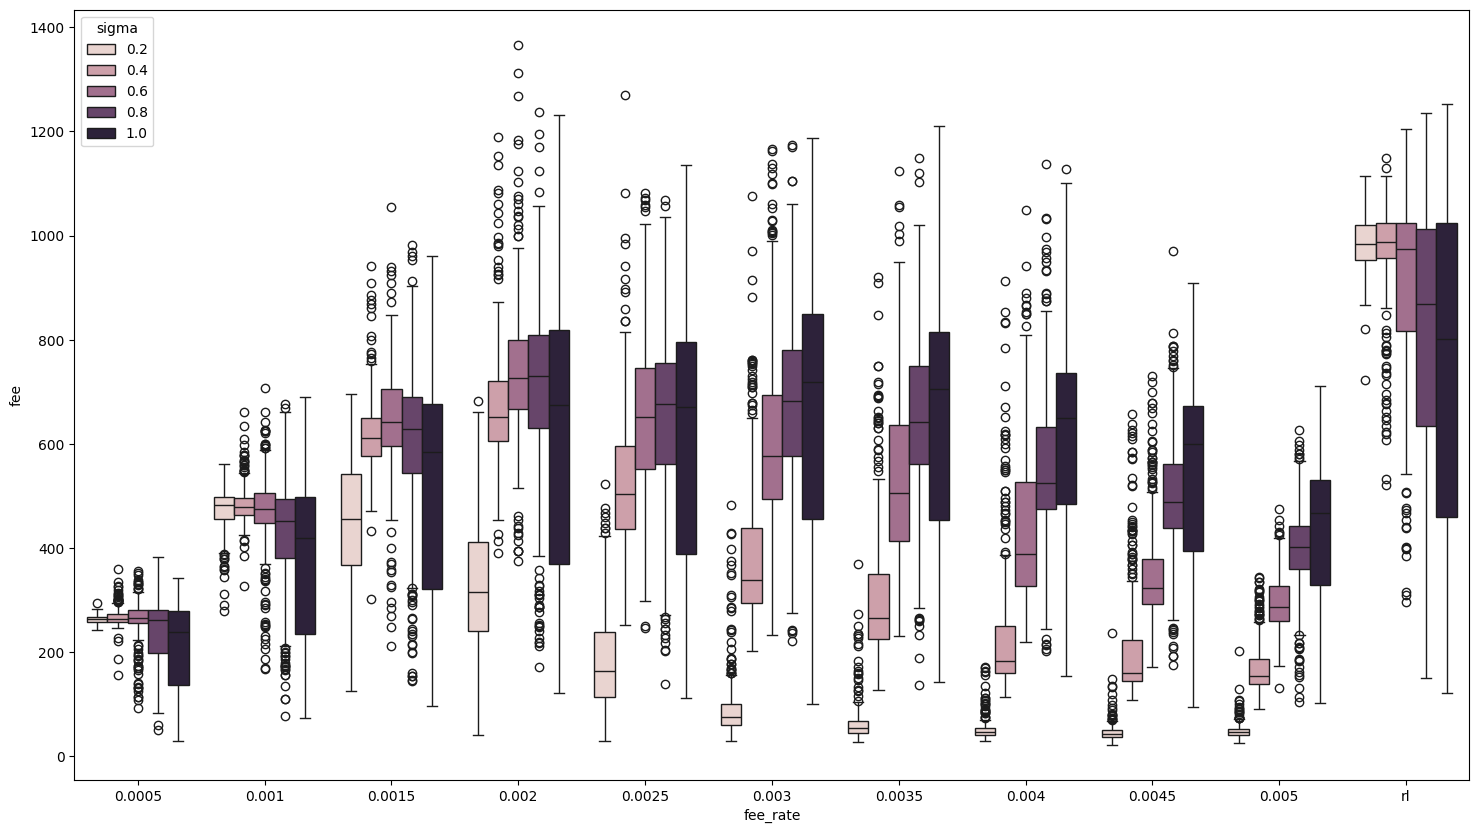

In [50]:
# plot fee_rate vs fee
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['fee'], hue=df['sigma'])
plt.show()
    

In [41]:
from scipy import stats

# Perform ANOVA for 'fee' based on 'fee_rate' for each 'sigma'
def perform_anova(df, target_col):
    unique_sigma = df['sigma'].unique()
    anova_results = {}

    for sigma_value in unique_sigma:
        subset = df[df['sigma'] == sigma_value]
        groups = [subset[target_col][subset['fee_rate'] == rate] for rate in subset['fee_rate'].unique()]
        
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[sigma_value] = {'F-Value': f_val, 'P-Value': p_val}
    
    return pd.DataFrame(anova_results).T

# Run the ANOVA function
anova_results = perform_anova(df, target_col='fee')

# Display the results
print(anova_results)

         F-Value        P-Value
0.2  5392.509368   0.000000e+00
0.4  1507.603951   0.000000e+00
0.6   692.614111   0.000000e+00
0.8   296.720905   0.000000e+00
1.0   156.115945  1.274458e-268


### II. Fee Rate vs. Total PnL

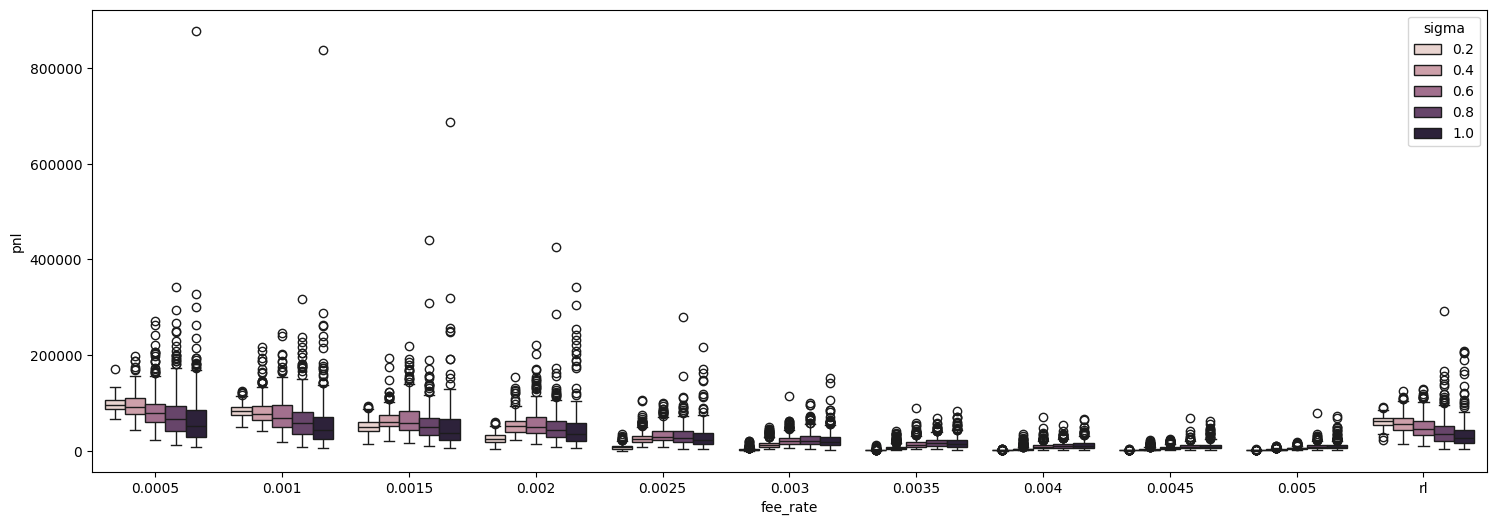

In [42]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['pnl'], hue=df['sigma'])
plt.show()

In [43]:
anova_results = perform_anova(df, target_col='pnl')
print(anova_results)

         F-Value        P-Value
0.2  5254.456337   0.000000e+00
0.4  1289.673442   0.000000e+00
0.6   460.439542   0.000000e+00
0.8   197.042021   0.000000e+00
1.0    80.522124  1.826785e-148


### III.    Fee Rates vs. Trading Volume

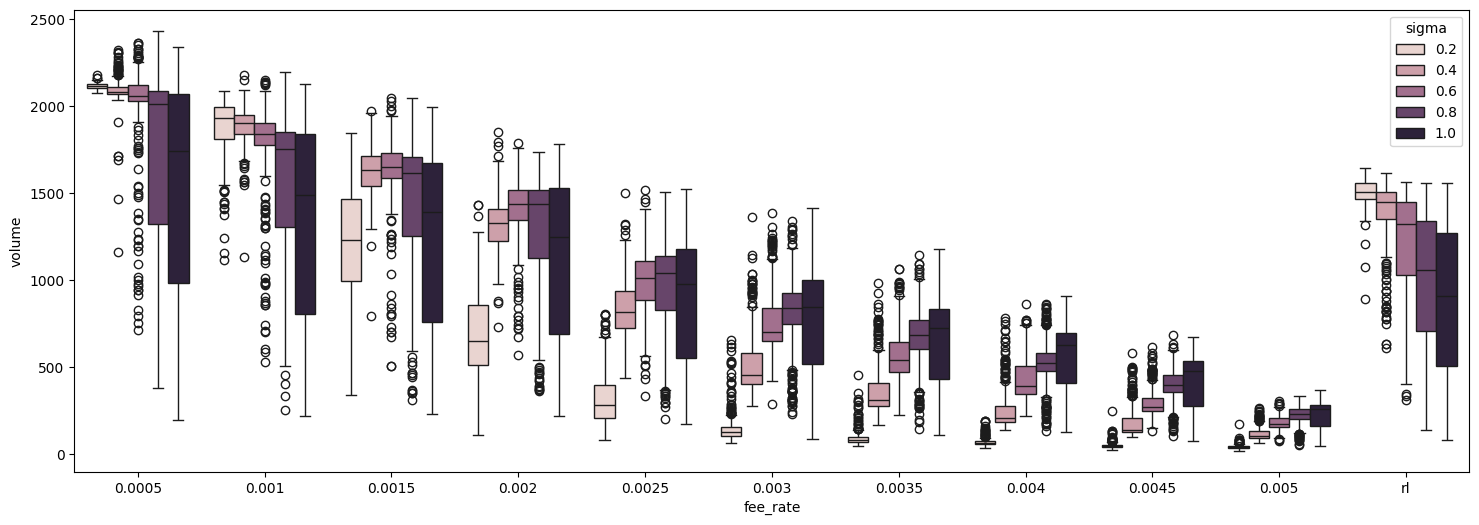

In [44]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['volume'], hue=df['sigma'])
plt.show()

In [45]:
anova_results = perform_anova(df, target_col='volume')
print(anova_results)

         F-Value  P-Value
0.2  8894.600362      0.0
0.4  8256.789848      0.0
0.6  2874.196104      0.0
0.8   811.784233      0.0
1.0   305.979406      0.0


### IV.     Fee Rates vs. Total Transactions

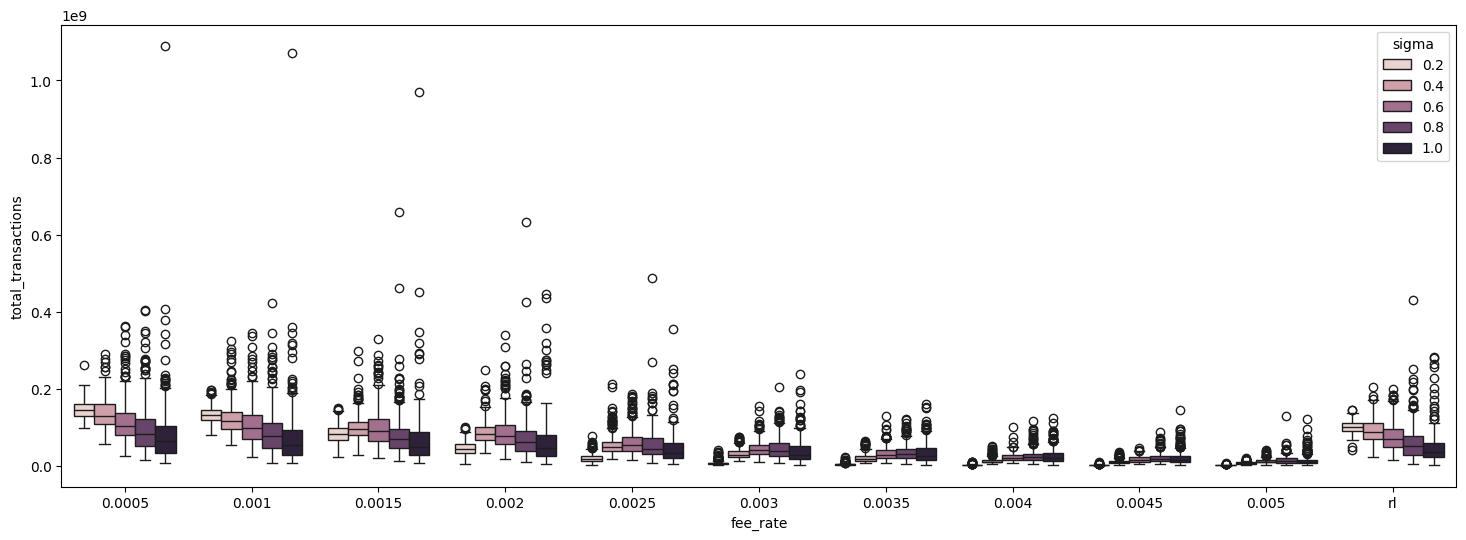

In [47]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['total_transactions'], hue=df['sigma'])
plt.show()

### V.  Dynamic Fee Rates

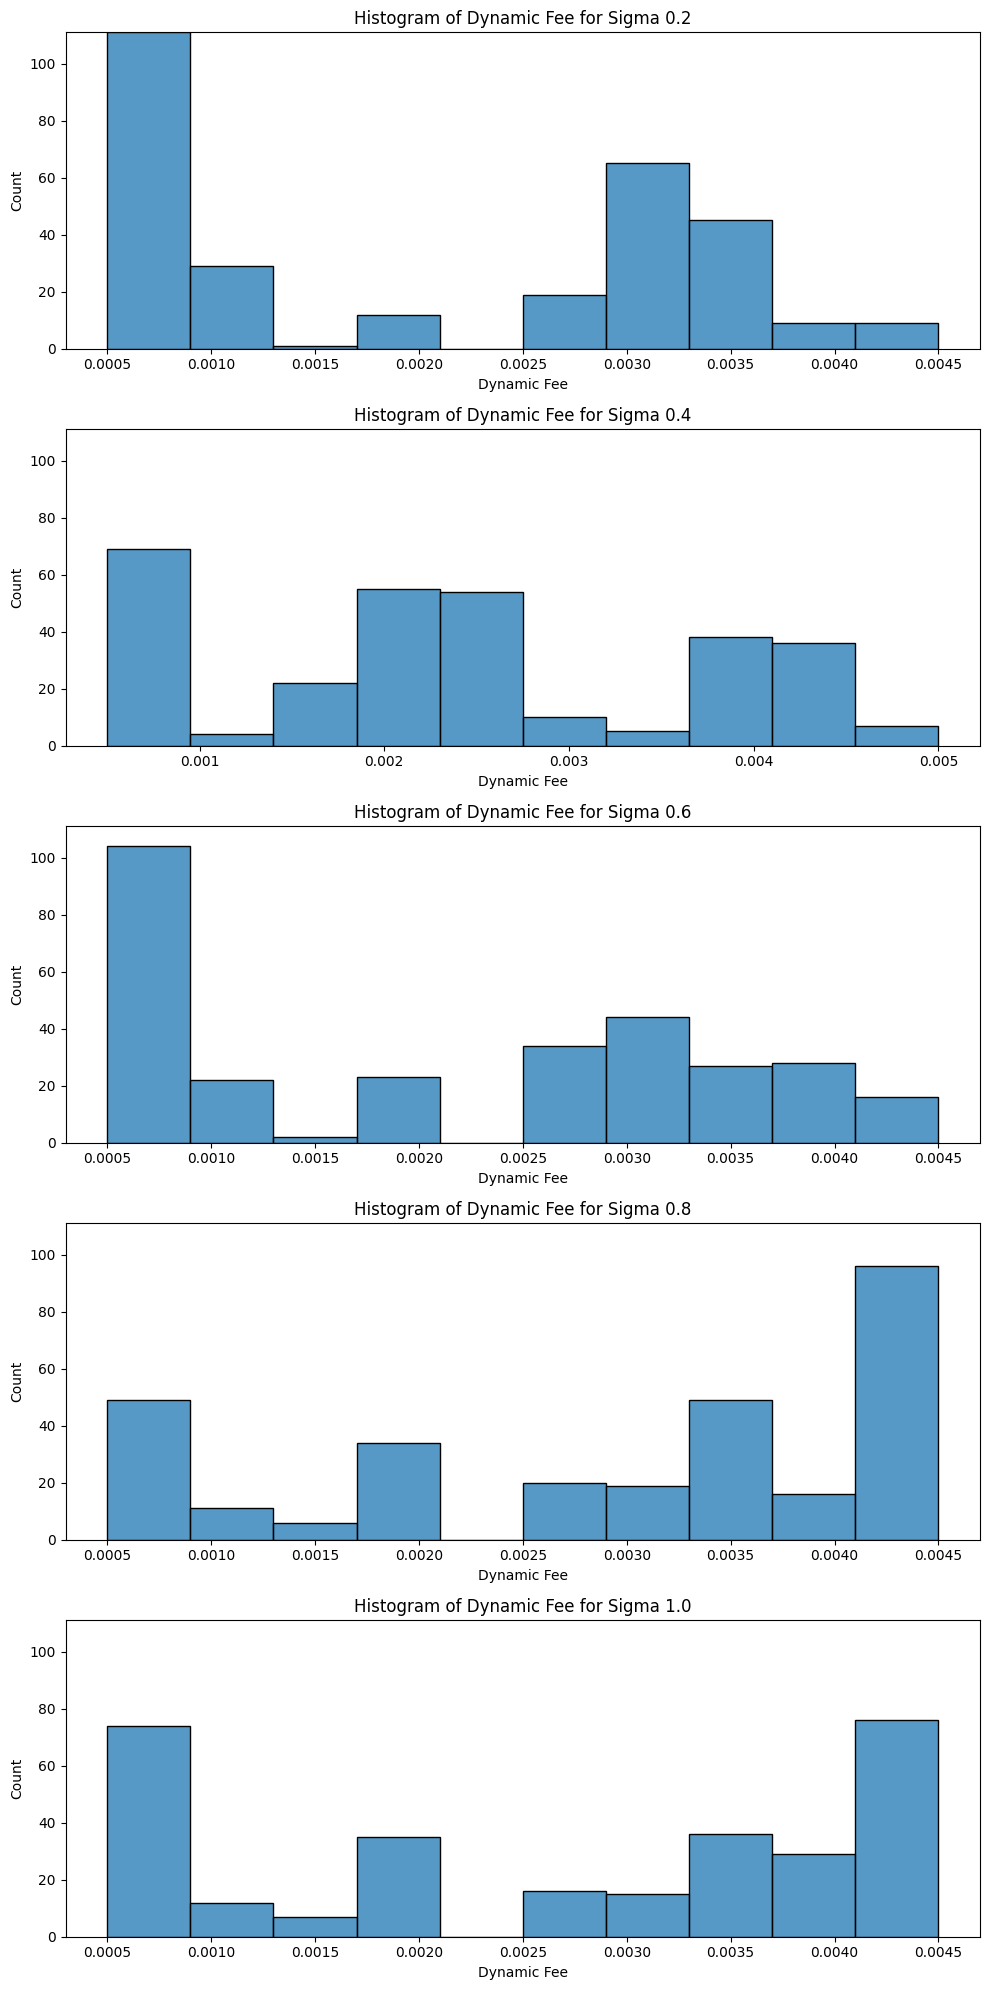

In [51]:
# Extract unique sigma values
sigmas = df['sigma'].unique()
rl_df = df[df['fee_rate'] == 'rl']

# Create subplots with vertical orientation
fig, axes = plt.subplots(len(sigmas), 1, figsize=(10, len(sigmas) * 4), sharey=True)

# Determine the global y-axis range across all sigma values
y_max = 0
for sigma in sigmas:
    subset = rl_df[rl_df['sigma'] == sigma]
    y_max = max(y_max, subset['dynamic_fee'].value_counts().max())

# Plot each sigma's histogram in a separate subplot
for i, sigma in enumerate(sigmas):
    subset = rl_df[rl_df['sigma'] == sigma]

    sns.histplot(data=subset, x='dynamic_fee', kde=False, ax=axes[i])
    
    axes[i].set_xlabel('Dynamic Fee')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of Dynamic Fee for Sigma {sigma}')
    axes[i].set_ylim(0, y_max)  # Set the same y-axis range for all plots

plt.tight_layout()
plt.show()